In [2]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from keras.utils import normalize
from tensorflow.keras.utils import to_categorical
import pennylane as qml
from pennylane import numpy as np
from skimage import io, color, transform

In [4]:
# Get the path of files
img_dir='drive/MyDrive/Colab Notebooks/brain-tumor-detection/'
no_images=os.listdir(img_dir + 'no/')
yes_images=os.listdir(img_dir + 'yes/')

In [5]:
# Initialize dataset and label arrays
dataset=[]
label=[]

In [6]:
IMG_SIZE = 128

In [7]:
# Loop over each image in each category

# For images labelled with no
for image_name in no_images:
  if(image_name.split('.')[1]=='jpg'):
    image = io.imread(img_dir + 'no/' +image_name)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = color.rgb2gray(image)                                   # convert to grayscale
    image = transform.resize(image, (IMG_SIZE, IMG_SIZE))             # resize to 64x64 pixels
    dataset.append(np.array(image))
    label.append(0)

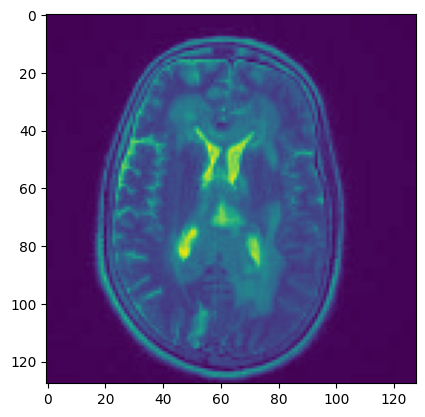

In [8]:
plt.imshow(dataset[1362])

In [10]:
# For images labelled with yes
for image_name in yes_images:
  if(image_name.split('.')[1]=='jpg'):
    image = io.imread(img_dir + 'yes/' +image_name)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = color.rgb2gray(image)                                   # convert to grayscale
    image = transform.resize(image, (IMG_SIZE, IMG_SIZE))             # resize to 64x64 pixels
    dataset.append(np.array(image))
    label.append(1)

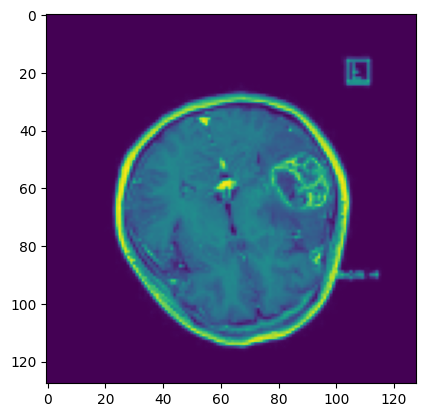

In [11]:
plt.imshow(dataset[6852])

In [13]:
# Convert dataset and label to numpy arrays   
dataset=np.array(dataset)
label=np.array(label)

/usr/local/lib/python3.9/dist-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


ValueError: ignored